# Project - Mercedes-Benz Greener Manufacturing

## DESCRIPTION
Reduce the time a Mercedes-Benz spends on the test bench.

## Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

## Following actions should be performed:

#### 1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

#### 2. Check for null and unique values for test and train sets.

#### 3. Apply label encoder.

#### 4. Perform dimensionality reduction.

#### 5. Predict your test_df values using XGBoost.


In [2]:
# 1.Import Libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# 2.Load Data

train_df=pd.read_csv('train.csv') # Loading Training csv file

In [4]:
# 3. Check info and shape of file

train_df.shape # printing No of rows and columns

(4209, 378)

In [5]:
train_df.head() # Check top 5 record

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Seperating y column for predicting output

y_train=train_df['y'].values
y_train

array([130.81,  88.53,  76.26, ..., 109.22,  87.48, 110.85])

In [7]:
y_train.shape

(4209,)

In [8]:
# Looking at the test dataset

test_df=pd.read_csv('test.csv')
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [9]:
# Create the final list of columns by removing unwanted columns ID and y

final_columns = list(set(train_df.columns)-set(['ID','y']))


In [10]:
# Now we can create the final dataset using final columns

x_train=train_df[final_columns] # x_train

x_test=test_df[final_columns]  # x_test

In [11]:
x_train.shape

(4209, 376)

In [12]:
x_test.shape

(4209, 376)

### If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [13]:
variance_train=pow(x_train.std(),2).to_dict()

count=0

for columns, value in variance_train.items():
    if(value==0):   
        print('Name: ',columns)
        count=count+1     

print('No of columns which has zero variance = ',count)

Name:  X107
Name:  X330
Name:  X293
Name:  X289
Name:  X11
Name:  X290
Name:  X233
Name:  X268
Name:  X347
Name:  X93
Name:  X297
Name:  X235
No of columns which has zero variance =  12


In [14]:
x_train=x_train.drop(columns={'X11','X93','X107','X233','X235','X268','X289','X290','X293','X297','X330','X347'})
x_train.shape

(4209, 364)

In [15]:
variance_test=pow(x_test.std(),2).to_dict()

count=0

for columns, value in variance_test.items():
    if(value==0):   
        print('Name: ',columns)
        count=count+1
        
print('No of columns which has zero variance = ',count)

Name:  X296
Name:  X258
Name:  X295
Name:  X257
Name:  X369
No of columns which has zero variance =  5


In [16]:
x_test=x_test.drop(columns={'X296','X258','X295','X257','X369'})
x_test.shape

(4209, 371)

### Check for null and unique values for test and train sets.

In [17]:
def for_null(df):
    if df.isnull().any().any():
        print("Yes")
    else:
        print("No")

In [18]:
for_null(x_train)

No


In [19]:
for_null(x_test)

No


In [20]:
uniqueValues_x_train = x_train[columns].unique()
print(uniqueValues_x_train)

[0 1]


In [21]:
uniqueValues_x_test = x_test[columns].unique()
print(uniqueValues_x_test)

[0 1]


### Apply label encoder

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [23]:
print(x_train.shape)
print(y_train.shape)

(4209, 364)
(4209,)


In [24]:
x_train.describe(include='object')

,X6,X5,X3,X1,X8,X4,X2,X0
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,12,29,7,27,25,4,44,47
top,g,w,c,aa,j,d,as,z
freq,1042,231,1942,833,277,4205,1659,360


In [25]:
x_train['X0']=le.fit_transform(x_train.X0)
x_train['X1']=le.fit_transform(x_train.X0)
x_train['X2']=le.fit_transform(x_train.X0)
x_train['X3']=le.fit_transform(x_train.X0)
x_train['X4']=le.fit_transform(x_train.X0)
x_train['X5']=le.fit_transform(x_train.X0)
x_train['X6']=le.fit_transform(x_train.X0)
x_train['X8']=le.fit_transform(x_train.X0)

### Perform dimensionality reduction

In [85]:
print(x_train.shape)
print(y_train.shape)

(4209, 364)
(4209,)


In [86]:
from sklearn.decomposition import PCA
pca=PCA(n_components=.95)

In [87]:
pca.fit(x_train,y_train)

PCA(n_components=0.95)

In [88]:
x_train_trans=pca.fit_transform(x_train)
print(x_train_trans.shape)

(4209, 1)


### Predict your test_df values using XGBoost

In [89]:
# Build model using train data set

In [90]:
import xgboost as xgb

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error

from math import sqrt

In [91]:
train_x,test_x,train_y,test_y = train_test_split(x_train_trans,y_train,test_size=.3,random_state=7)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(2946, 1)
(1263, 1)
(2946,)
(1263,)


In [92]:
# XGBoost's hyperparameters tuning manually

In [93]:
xgb_reg=xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.3,learning_rate=0.4,max_depth=10,alpha=6,n_estimators=20)
model=xgb_reg.fit(train_x,train_y)


[16:22:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [94]:
print('RMSE= ',sqrt(mean_squared_error(model.predict(test_x),test_y)))

RMSE=  10.006045718212373


In [95]:
# After tuning the hyperparameters to meet minimum RMSE, RMSE turned out as 10.006

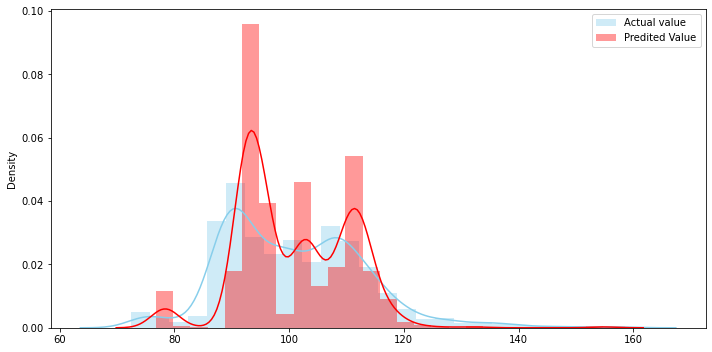

In [96]:
pred_test_y=model.predict(test_x)

plt.figure(figsize=(10,5))

sns.distplot(test_y[test_y<160],color='skyblue',label="Actual value")
sns.distplot(pred_test_y[pred_test_y<160],color='red',label='Predited Value')
plt.legend()

plt.tight_layout()

In [97]:
# k-fold Cross Validation using XGBoost

In [98]:
dmatrix_train = xgb.DMatrix(data=x_train_trans,label=y_train)

params = {'objective':'reg:linear', 'colsample_bytree': 0.3, 'learning_rate': 0.3, 'max_depth': 5, 'alpha': 10}

model_cv = xgb.cv(dtrain=dmatrix_train, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10, 
                      metrics="rmse", as_pandas=True, seed=7)
model_cv.tail(4)

[16:22:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[16:22:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[16:22:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
14,8.020918,0.343330,8.572229,0.861861
15,7.973011,0.337164,8.554325,0.858050
16,7.901734,0.289200,8.557052,0.854903
17,7.866820,0.310964,8.549664,0.844593


In [99]:
# However, using k-fold cross validation, RMSE comes as 8.55. 

## Prediction on test data set using XGBoost

In [100]:
x_test=test_df.drop(columns={'X11','X93','X107','X233','X235','X268','X289','X290','X293','X297','X330','X347'})
x_test.shape

(4209, 365)

In [101]:
x_test.isnull().sum().any()

False

In [102]:
x_test_feature=x_test.drop(columns={'ID'})
print(x_test_feature.shape)

(4209, 364)


In [103]:
x_test_feature.describe(include='object')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,49,27,45,7,4,32,12,25
top,ak,aa,as,c,d,v,g,e
freq,432,826,1658,1900,4203,246,1073,274


In [104]:
x_test_feature['X0']=le.fit_transform(x_test_feature.X0)
x_test_feature['X1']=le.fit_transform(x_test_feature.X1)
x_test_feature['X2']=le.fit_transform(x_test_feature.X2)
x_test_feature['X3']=le.fit_transform(x_test_feature.X3)
x_test_feature['X4']=le.fit_transform(x_test_feature.X4)
x_test_feature['X5']=le.fit_transform(x_test_feature.X5)
x_test_feature['X6']=le.fit_transform(x_test_feature.X6)
x_test_feature['X8']=le.fit_transform(x_test_feature.X8)

In [105]:
pca.fit(x_test_feature,y_train)

PCA(n_components=0.95)

In [106]:
x_test_trans=pca.fit_transform(x_test_feature)
print(test_x_trans.shape)

(4209, 6)


In [112]:
test_pred = model.predict(x_test_trans)
test_pred

ValueError: Feature shape mismatch, expected: 1, got 4209